# Lab 1


## Preparation Tasks


1. Block diagram:

 ![block diagram](block.jpg)


2. 
    * We assume minimum 16 clock cycles
    * 3.3V would give a resolution of approx. 0.8mV
    * max 3.3, min 100mV.
    
3. 
When sampling on a microprocessor you would want to sample consistanly all the time. However, the operating system schedules tasks all the time, so inbetween samples there might be a delay. When using the DMA the gpio circuits are sampling directly to the memory without interruption from the CPU, so that the CPU would only need to pull data from the buffer every now and then. 


## Lab assignments


1. Filter

    The filter is a LC filter, it attenuates high frequencies. The ceramic capacitor attenuates higher frequencies than the electrolyte. The filter works pretty well, we have a nice attenuation of frequencies over 72Hz. However the frequencies above 50KHz are not attenuated that much because of the resonant nature of the LC filter and the use of electrolytes.

    ![bode plot](bodeplot3.PNG)

    The cutoff frequency is defined as the frequency where the signal is attenuated with 3dB, so 72Hz in this case.  
       
2. See the block diagram I guess.



In [47]:
import numpy as np
import matplotlib.pyplot as plt


from raspi_import import raspi_import

sample_period, data4 = raspi_import("./out/adcData_sin3.bin")
sample_period, data3 = raspi_import("./out/adcData_sin2.bin")
sample_period, data2 = raspi_import("./out/adcData_sin.bin")
sample_period, data1 = raspi_import("./out/adcData_pot.bin")


def fft(data, zoom = 12, fs = 31250):
    meas1 = data.T[0][1:] # try [:,1]

    fft = np.abs(np.fft.fft(meas1))
    
    #fftfreq
    #fftshift
    
    
    fft = fft[:len(fft)//zoom]
    x = np.linspace(0, fs/zoom, len(fft))
    plt.plot(x,fft)
    
    
    
    plt.show()

Plotting every channel seperatly, they are connected together to a potentiometer that was turned while sampling:

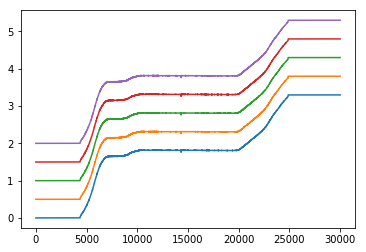

In [48]:
offset = 0
for adc in data1.T:
    
    raw_meas = adc[1:]
    
    reference_voltage = 3.300
    
    resolution_bits = 4096
    
    voltage = (raw_meas* reference_voltage)/ resolution_bits + offset
    
    plt.plot(voltage)
    
    offset += 0.5
    
plt.show()

Now there is a sine with 2KHz on channel 1. Plotting FFT:

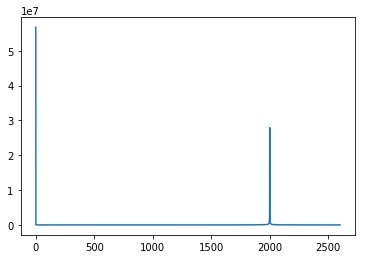

In [49]:
fft(data2)

As we see there is a almost perfect sine at 2Khz, which is nice. The sampling frequency was 31250Hz so the sampling theorem is satisfied.
Now we have 10KHz frequency:

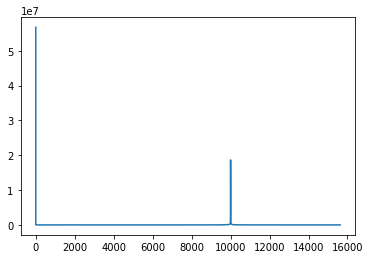

In [43]:
fft(data3,zoom=2)

Perfect. Now we apply a frequency of 16KHz, which should be aliased since the sampling frequency is 31250KHz. The frequency should be 15250HZ

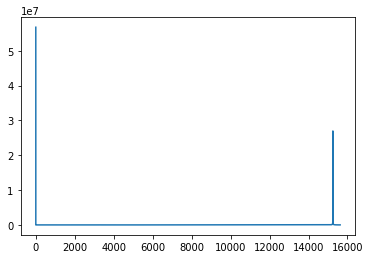

In [46]:
fft(data4,zoom=2)